# Introducntion
## Sequential vs Parallel Programmin 
* __Sequential programming__ - executing instruction one by one. Limited by processor speed.
* __Parallel Programmin__ - break ( _fork_ ) the program into multiple independent sequence of instructions simultainusly, while maintaining synchonization between then and finally _join_ them together.  

Adding $n$ processor doesn't make the process $n$ times faster, as it also increase the synchronization (using __IPC__ or __RPC__) burden. 

## Parallel architecture 

__Flynn's Taxonomy__
1. __SISD__ : Single instruction single data. $y=f(X)$ 
    * one CPU runs executes one instruction $f$ on one data $X$ at any time 
    * Sequenctial processing 
    
2. __SIMD__ : Single instruction Multiple data $\{y_i\}=f(X_i\in X)$
    * Multiple CPU takes one instrucntion from Instruction register and apply it on their indevidual data.
    * Same operation is computed on many data stream simultainusly, in sync with with eachother. 
    * Tasks such as Image processing (e.g. Convolution, geometric transformation) makes use of this. 
    
3. __MISD__ : Multiple instruction Single Data $\{y_i\}=\{f_i(X)|f_i\in F\}$
    * Each CPU takes individual instruction but data from a common data bus 
    * not that much used in pracice 

4. __MIMD__ : Multiple Instruction Multiple Data $\{y_i\}=\{f_i(X_j\in X) |f_i \in F\}$ 
    * most commonly used architecture, used in multicore CPU to networked clusters 
    * Further subdevided into 
        1. __Single Program Multiple Data (SPMD)__ : Multiple Core execures a same copy of a single prgram on different data. It is different from SIMD as it may use same program but the same instruction at a given time. Each CPU executes a different part of the program and maintains sync to ensure integrity while joining them. 
        2. __Multiple program Multiple Data (MPMD)__ : Each core has independent program and data memory. A typical use case of cluster computing model, where there's manager nodes that distributes, load balance and maintain message-passing among several worker nodes.
 
## Memory Models
* __Shared memory__ : All process shares the same memory module as a global address space.
    * If one CPU makes any change in the memory, other must be notified 
    * The _shared_ term doesn't yield physical centralization, it may spread accross a network and make communicaion over IPC/RPC protocols. 
    * __Classificaion__ : 
        1. __Uniform Memory Access (UMA)__ : all CPU has euqal access to the memory, among several type, __Symetric Multi-Processing (SMP)__ is the most used one. in SMP, each CPU also maintains its own Cache memory, any updates must be __written back__ (Write back Cache) to the main memory, to prevent other CPU's access to any outdated data. this is called __Cache Coherency__ problem, which is tackled by the processor hardware but introduces a performance overhead too.  
        2. __Non Uniform Memory Access (NUMA)__ : Each CPU has its own memory block and CPU Systems communicate through a shared system bus (typically networked), the access time is not uniform however, they almost can see the global address spece    
    * Shared memory systems are __Not scalable__. adding more componets in the system loads the system bus and eventually struggles to get good throughput.  Also it leaves the __Sycnrinizaion__ task to the programmer.
    
* __Distributed Memory__ : Each processor has it's own memory with __Private Address Space__. any change to a local memeory doen't need to get conveyed to other CPU. Mainly used for large cluster computing systems. 

# Thread and Processes
A __process__ is a _program in execution_ and a comprised of many sub-tasks sharing same runtime and memory, called __thread__. Each thread works independently, they can be invoked and can leave dynamically. __Resource sharing__ is more easy in multi-threaded system than a multi-processing systems. The __Inter-process Communication__ can be done using __Pipes__ if its within a same system or __Sockets__ if running over network. 

## Concurrent vs Parallelism 
* __Concurrency__ : Abilities of a program ti be broken into parts that can be execured independently of each other. for a single processor systems, __Schedulars__ manages it. A concurrent program is not inherently parallel. Typically used for __I/O intesive__ operation to utilize CPU idle time more efficiently.
* __Parallelism__ : True prarallism is possible when there exists a parallel hardware (Multiple processor cores). Typically used for __CPU intensive__ operations. 

| Concurrency | Parallelism |
|---          | ---         |
| Program structure | Simultainus execution |
| __Dealing__ with multiple things at once | __Doing__ multiple things at once |

## Global Interpreter Lock (GIL)

python doens't allow multile Prallel theads but concurrent threads due to GIL. for a program consisting of $n$ concurrent thread, only one would execute at a given time while keeping rest $n-1$ at idle state. 

This happens as the python is an __interpreted language__, each program first gets intrepreted into a _byte code_ which then gets executed by the _virtual machine_. The default interpreter is __CPython__, the GIL is a native property of underlying __C__ libraries to implement a __Thread-safe__ operation. How ever the GIL brings stability to the system, this its disadvantages is out weighed. Interpreters that dont have GIL implemented are __Jython__ (java based), __IronPython__ (.net based), __PyPy-STM__. 

However, GIL doens not create a siginificant bottleneck for I/O bound taks, thus concurrency is useful, but this is not ta case of CPU bound tasks. To implement concurrency in cou-bound tasks, __multiprocessing__ package is one which is used that __threading__ package. Each process would implement its indevidual GIL thus no restriction, however the __IPC__ needs to be detl separetly, as it's a bit more complex than that of a multi-threaded scenario and consumes __more system resources__. 

## Python Threading Module

In [18]:
import os
import threading
import time

# step 1: create a function
def th_fun(n,c):
    while c >=0:
        # print is an I/O operation
        print(f'I am PID={os.getpid()} and thread num = {n}')
        print(f'\t[{time.strftime("%m %s")}]\t with count={c}')
        time.sleep(1)
        c -= 1

# step 2: create a thread
th_num = 3
runtime = 4
for i in range(th_num):
    threading.Thread(target=th_fun,     #assign the function as thread
                     args=(i,runtime)   #supply nessesary parameter
                    ).start()           #start the thread 

I am PID=28329 and thread num = 0
	[05 1590591607]	 with count=4
I am PID=28329 and thread num = 1
	[05 1590591607]	 with count=4
I am PID=28329 and thread num = 2
	[05 1590591607]	 with count=4
I am PID=28329 and thread num = 0
	[05 1590591608]	 with count=3
I am PID=28329 and thread num = 1I am PID=28329 and thread num = 2
	[05 1590591608]	 with count=3

	[05 1590591608]	 with count=3
I am PID=28329 and thread num = 0
	[05 1590591609]	 with count=2
I am PID=28329 and thread num = 2
	[05 1590591609]	 with count=2
I am PID=28329 and thread num = 1
	[05 1590591609]	 with count=2
I am PID=28329 and thread num = 0
	[05 1590591610]	 with count=1
I am PID=28329 and thread num = 2
	[05 1590591610]	 with count=1
I am PID=28329 and thread num = 1
	[05 1590591610]	 with count=1
I am PID=28329 and thread num = 0
	[05 1590591611]	 with count=0
I am PID=28329 and thread num = 2
	[05 1590591611]	 with count=0
I am PID=28329 and thread num = 1
	[05 1590591611]	 with count=0


In [25]:
import os
import multiprocessing as mp
import time

# step 1: create a function
def pr_fun(n,c):
    while c >=0:
        # print is an I/O operation
        print(f'I am PID={os.getpid()} and thread num = {n}')
        print(f'\t[{time.strftime("%m %s")}]\t with count={c}')
        time.sleep(1)
        c -= 1

# step 2: create some global vars
pr_num = 3
runtime = 4

# step 3: it is mandatory to create a main func 
if __name__ == '__main__': 
    for i in range(pr_num):
        #step 4 : now create a process
        mp.Process(target=pr_fun,     #assign the function as thread
                   args=(i,runtime,)  #supply nessesary parameter
                  ).start()           #start the thread 

I am PID=30420 and thread num = 0
I am PID=30423 and thread num = 1
	[05 1590592186]	 with count=4
I am PID=30428 and thread num = 2
	[05 1590592186]	 with count=4
	[05 1590592186]	 with count=4
I am PID=30423 and thread num = 1
	[05 1590592187]	 with count=3
I am PID=30428 and thread num = 2
I am PID=30420 and thread num = 0
	[05 1590592187]	 with count=3
	[05 1590592187]	 with count=3
I am PID=30423 and thread num = 1
	[05 1590592188]	 with count=2
I am PID=30420 and thread num = 0
	[05 1590592188]	 with count=2
I am PID=30428 and thread num = 2
	[05 1590592188]	 with count=2
I am PID=30423 and thread num = 1
	[05 1590592189]	 with count=1
I am PID=30420 and thread num = 0
	[05 1590592189]	 with count=1
I am PID=30428 and thread num = 2
	[05 1590592189]	 with count=1
I am PID=30423 and thread num = 1
	[05 1590592190]	 with count=0
I am PID=30420 and thread num = 0
	[05 1590592190]	 with count=0
I am PID=30428 and thread num = 2
	[05 1590592190]	 with count=0


The abobe stated examples show how __PID__ was identical for multi-threaded one while being differerent in multi-processing. The reason, we need to put the main function in case of multi-processing is as follows. Python goes through the whole program in order to find where the intended function is, but in doing so the __Spawing__ command is also execured, which makes another lookup call that would again encounter the __Spawning__ command. Henceforth, it eventually turns into a __infinite-spawnig__ process. If the spawned function is a infinite loop iteself, it may crash the system, thus python detects this before hand and would throw an __exception__ if not found complient. 

## Scheduling 
Operating systems controls the __dispatch sequecne__ using the __Schedular__ process that runs a __Quequing algorithm__ underneath. In a __preemptive__-scheduling scenario, when each process can be stopped by the scedular in the middle of their execution, to give control to another process called __Context swicting__. While switching a process must backup all its runtime data stored into a specific data structure called __Process control block__ (PCB), in order to resume seemlessly. This brings an additional overhead as the backprocess would access memory write operations. Thus, schedulars must optimise the switcing process to get better througput, while maintaing concurrancy. In fail doing this would cause a problem called __Thashing__ when the CPU becomes too busy in switchig context than actually executing the process. The choice of the scheduling algorithm is driven by the program's goal and it is controlled by the OS. 

The following program shown the scheduling is not always fair. __Check the final count__

In [26]:
import threading
import time 

In [57]:
# global var controls the thread life  
state = None

In [54]:
def th_count():
    name = threading.current_thread().getName()
    local_count = 0
    
    while state == None:
        print(f'\t {name} waiting...')
        time.sleep(1)
    
    print(f'\n\t {name} : enterring counting state... @[{time.strftime("%m:%s")}]')
    
    while state:
        local_count += 1
        
    print(f'\n\t Goodbye from {name} @[{time.strftime("%m:%s")}], counted {local_count}')

In [65]:
def main():
    th_list = [] # holds thread obects 
    name_list = ['th1','th2','th3'] 
    runtime = 5 # thread runtime 
    global state
    
    state = None #external control mechanism 
    
    # creating a thread list
    for i in range(len(name_list)):
        th_list.append(threading.Thread(name = name_list[i],
                                        target= th_count)
                      )
    #starting all threads in the list
    for t in th_list:
        t.start()
    
    print('waiting in main...')
    time.sleep(2)
    
    print('setting state=True')
    state = True
    #let them run for 1 sec
    time.sleep(runtime)
    
    # now stop all thread 
    print('setting state=False')
    state = False
    
    for t in th_list:
        t.join()

In [66]:
main()

	 th1 waiting...
	 th2 waiting...
	 th3 waiting...
waiting in main...
	 th1 waiting...
	 th2 waiting...	 th3 waiting...

	 th1 waiting...
setting state=True	 th2 waiting...


	 th3 : enterring counting state... @[05:1590595988]

	 th1 : enterring counting state... @[05:1590595989]

	 th2 : enterring counting state... @[05:1590595989]
setting state=False

	 Goodbye from th3 @[05:1590595993], counted 45573165

	 Goodbye from th2 @[05:1590595993], counted 15389217

	 Goodbye from th1 @[05:1590595993], counted 22351422


## Daemon Thread
A parant thread can't exit execution while any of its childern threads are running, otherwise the child would become an __Orphan__ thread. There are threads such as __Automatic Garbage Collector__ that crears all unused memory runs in parallel to a main thread. Now, that makes a dead-lock scenario, as the main thead can't exist because the child garbage collector is running, and the garbage collector can't too as it's job to collect its parant's garbage untill it finishes. Therefore we need to isolate the childern thread execution from that of its parant's, which is called a __Daemon__ thread or a background thread.  
* Any thread starts as a non-daemon, it needs to be made __explicitly__
* Make sure any daemon thread should not be attached to any I/O operation, as stopping in the middle may currupt the data that it was deadling with.



In [95]:
# daemon thread
def d_fun(n):
    while n:
        print(f"\t i'm child... {n} sec left")
        time.sleep(1)
        n -= 1
    print("\t i'm child... goodbye")

#caller
def main():
    p = 5   # parant's runtime
    n = 10  # child's runtime  
    d = threading.Thread(target=d_fun, args=[n])
    d.start()
    while p:
        print(f"i'm parant... {p} sec left")
        time.sleep(1)
        p -= 1
    print(f"i'm parant... goodbye")
    return 0

In [96]:
main()
print('done!')

	 i'm child... 10 sec left
i'm parant... 5 sec left
	 i'm child... 9 sec lefti'm parant... 4 sec left

	 i'm child... 8 sec left
i'm parant... 3 sec left
	 i'm child... 7 sec left
i'm parant... 2 sec left
	 i'm child... 6 sec left
i'm parant... 1 sec left
	 i'm child... 5 sec left
i'm parant... goodbye
done!
	 i'm child... 4 sec left
	 i'm child... 3 sec left
	 i'm child... 2 sec left
	 i'm child... 1 sec left
	 i'm child... goodbye


As it's seen, that child kept executing even if the parant finished. Now make it a daemon 

In [92]:
# daemon thread
def d_fun(n):
    while n:
        print(f"\t i'm child... {n} sec left")
        time.sleep(1)
        n -= 1
    print("\t i'm child... goodbye")

#caller
def main():
    p = 5   # parant's runtime
    n = 10  # child's runtime  
    d = threading.Thread(target=d_fun, args=[n])
    d.daemon = True
    d.start()
    while p:
        print(f"i'm parant... {p} sec left")
        time.sleep(1)
        p -= 1
    print(f"i'm parant... goodbye")
    return 0

In [97]:
main()
print('done!')

	 i'm child... 10 sec lefti'm parant... 5 sec left

	 i'm child... 9 sec left
i'm parant... 4 sec left
	 i'm child... 8 sec left
i'm parant... 3 sec left
	 i'm child... 7 sec lefti'm parant... 2 sec left

	 i'm child... 6 sec left
i'm parant... 1 sec left
	 i'm child... 5 sec left
i'm parant... goodbye
done!
	 i'm child... 4 sec left
	 i'm child... 3 sec left
	 i'm child... 2 sec left
	 i'm child... 1 sec left
	 i'm child... goodbye


# Mutual Exclusion
__Race__ condition happens when multiple hreads try accessing a shared memory resources. 
the follwoing program runs $m$ threads, each increaments a `shared_counter` for $n$ times. The expected outcome would be $mn$ but after executing them parallelly, the final count returnd by $caller(rt=n)$ compared. The squared error is plotted in $log$ sclale. 

In [81]:
#race condition
import threading
import matplotlib.pyplot as plt
import random 
import time

shared_counter = 0 
lock = threading.Lock()

def th_count(n,sync):
    '''
        get n as integer and adds sequenctially 
        to shared counter in a loop 
    '''
    global shared_counter
    global lock
    name = threading.current_thread().getName()
    while n>0:
        if sync:
            with lock:
                shared_counter += 1
        else:
            shared_counter += 1
        n -= 1
    #print(f'\t{name} done!')
    
def caller(n,m,sync):
    '''
        crates, run and destry m threads 
        each adds n to the shared_counter 
        returns the final value of the counter 
    '''
    global shared_counter
    shared_counter = 0
    names = [f'th_{j}' for j in range(1,m+1)] #names th_1...th_m
    #print(f'count = {shared_counter}')
    for i in range(len(names)):
        if sync==True:
            t = threading.Thread(name=names[i],
                             target=th_count,
                             args=(n,True))
        else:
            t= threading.Thread(name=names[i],
                         target=th_count,
                         args=(n,False))
        t.start()
        
    #print(f'count = {shared_counter}')
    return shared_counter

def main():
    '''
        calls the caller funtion for a range of numbers to add
        and numbers of threads
        gets the deviation between expected and computed data and 
        plots it
    '''
    
    import math
    #deviations
    x = [] 
    dev_y = []
    dev_y_sync = []
    m = 20 #number of threads 
    print('calculating...')
    for i in range(10,pow(10,5),pow(10,3)):
        global shared_counter
        shared_counter = 0
        
        x.append(i)
        dev_y.append(math.sqrt( 
                        pow( (m*i)-caller(i,m,sync=False) ,2 ))
                    )
        dev_y_sync.append(math.sqrt(
                        pow( (m*i)-caller(i,m,sync=True),2 ))
                         )
    #plt.yscale('log')
    plt.plot(x,dev_y,'r',label='without sync');
    plt.plot(x,dev_y_sync,'g',label='with sync');
    plt.legend()
    plt.show()

calculating...


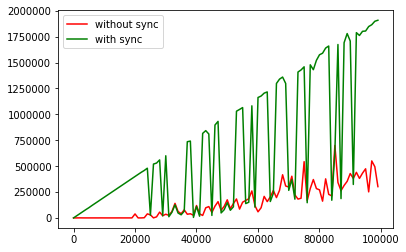

In [82]:
main()

To solve this problem a __Mutex__ variable is used, who ever aquires 

In [99]:
print(caller(100,2,sync=False))
print(caller(10,2,sync=False))
print(caller(10000,2,sync=False))
print(caller(1000000,2,sync=False))

232
26
20006
1490811


In [101]:
print(caller(100,3,sync=True))

38
